# Playground notebook for OSMnx

In [1]:
import osmnx as ox

## Some helpful repos:
* https://github.com/WilliamThyer/bike_networks
* https://github.com/mszell/bikenwgrowth

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


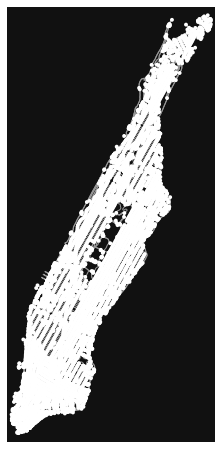

In [2]:
G = ox.graph_from_place("Manhattan, New York, USA", network_type="bike")
fig, ax = ox.plot_graph(G)

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


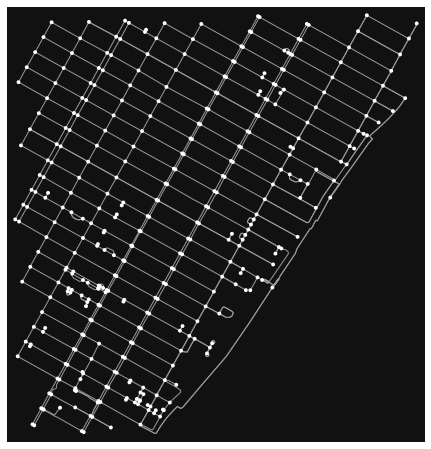

In [3]:
G = ox.graph_from_address("420 East 73rd Street, New York, New York 10021", network_type="bike")
fig, ax = ox.plot_graph(G)

In [4]:
# lat/long of two citibike docks on the UES
starting_point_coord = (40.768998, -73.954808)
ending_point_coord = (40.771166, -73.964105)

In [5]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, starting_point_coord[1], starting_point_coord[0], return_dist=False)
dest = ox.distance.nearest_nodes(G, ending_point_coord[1], ending_point_coord[0], return_dist=False)

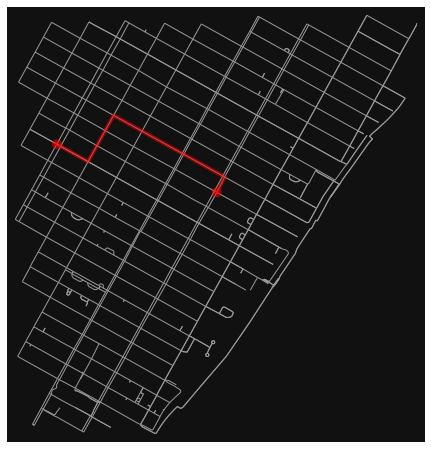

In [6]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [7]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, "length")
round(sum(edge_lengths))

1096

In [8]:
edges = ox.graph_to_gdfs(G, nodes=False)

In [9]:
edges

osmid bridge  oneway   lanes  \
u          v          key                                                  
42423747   42423752   0     [32947297, 544616717]    yes    True       3   
42423752   6263094853 0                  46211828    NaN    True       2   
           6744466013 0                  46419221    NaN    True       3   
42424089   7064022539 0                 198924551    NaN    True     NaN   
           42442961   0    [818182930, 358290454]    NaN    True  [6, 5]   
...                                           ...    ...     ...     ...   
9001600168 8996988342 0                 972597726    NaN   False     NaN   
9030177779 42447237   0                  46334587    NaN    True     NaN   
           9030177782 0                 975853437    NaN   False     NaN   
9030177782 9030177779 0                 975853437    NaN   False     NaN   
9100506061 4205892229 0                 984243828    NaN   False     NaN   

                                                            name      highway  \
u          v          key                                                       
42423747   42423752   0    Ed Koch Queensboro Bridge Upper Level        trunk   
42423752   6263094853 0                         East 62nd Street     tertiary   
           6744466013 0                                      NaN        trunk   
42424089   7064022539 0                         East 59th Street  residential   
           42442961   0                               2nd Avenue      primary   
...                                                          ...          ...   
9001600168 8996988342 0                                      NaN      service   
9030177779 42447237   0                         East 66th Street  residential   
           9030177782 0                                      NaN      service   
9030177782 9030177779 0                                      NaN      service   
9100506061 4205892229 0                                      NaN      service   

                          maxspeed   length  \
u          v          key                     
42423747   42423752   0     15 mph  108.711   
42423752   6263094853 0        NaN  124.115   
           6744466013 0        NaN   80.138   
42424089   7064022539 0        NaN   10.841   
           42442961   0     25 mph   79.488   
...                            ...      ...   
9001600168 8996988342 0        NaN   19.059   
9030177779 42447237   0        NaN  164.679   
           9030177782 0        NaN   25.036   
9030177782 9030177779 0        NaN   25.036   
9100506061 4205892229 0        NaN   23.013   

                                                                    geometry  \
u          v          key                                                      
42423747   42423752   0    LINESTRING (-73.96261 40.76122, -73.96219 40.7...   
42423752   6263094853 0    LINESTRING (-73.96200 40.76208, -73.96073 40.7...   
           6744466013 0    LINESTRING (-73.96200 40.76208, -73.96161 40.7...   
42424089   7064022539 0    LINESTRING (-73.96436 40.76062, -73.96424 40.7...   
           42442961   0    LINESTRING (-73.96436 40.76062, -73.96440 40.7...   
...                                                                      ...   
9001600168 8996988342 0    LINESTRING (-73.95269 40.77324, -73.95264 40.7...   
9030177779 42447237   0    LINESTRING (-73.95706 40.76327, -73.95865 40.7...   
           9030177782 0    LINESTRING (-73.95706 40.76327, -73.95701 40.7...   
9030177782 9030177779 0    LINESTRING (-73.95692 40.76346, -73.95701 40.7...   
9100506061 4205892229 0    LINESTRING (-73.95367 40.76570, -73.95354 40.7...   

                          tunnel   service access junction  
u          v          key                                   
42423747   42423752   0      NaN       NaN    NaN      NaN  
42423752   6263094853 0      NaN       NaN    NaN      NaN  
           6744466013 0      NaN       NaN    NaN      NaN  
42424089   7064022539 0      NaN       NaN 

In [10]:
edges.loc[:, "highway"].values

array(['trunk', 'tertiary', 'trunk', 'residential', 'primary', 'tertiary',
       'secondary', list(['residential', 'secondary']), 'cycleway',
       'secondary', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'tertiary', list(['tertiary', 'residential']),
       'secondary', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'service', 'secondary', 'secondary', 'residential',
       'service', 'residential', 'secondary', 'secondary', 'residential',
       'secondary', 'secondary', 'residential', 'secondary', 'secondary',
       'service', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'secondary', 'residential', 'secondary', 'secondary',
       'secondary', 'secondary', 'residential', 'secondary', 'secondary',
       'residential', 'secondary', 'secondary',
       list(['path', 'residential']), 'residential', 'secondary',
       'secondary', 'residential', 'secondary', 'secondary',
       'residential', 'residentia

In [11]:
bikepaths_only = edges[edges.loc[:, "highway"].isin(["cycleway"])]

In [12]:
nodes = ox.graph_to_gdfs(G, edges=False)

In [13]:
nodes

,y,x,street_count,highway,geometry
osmid,,,,,
42423747,40.761219,-73.962615,1,NaN,POINT (-73.96261 40.76122)
42423752,40.762077,-73.961996,4,traffic_signals,POINT (-73.96200 40.76208)
42424089,40.760621,-73.964356,4,traffic_signals,POINT (-73.96436 40.76062)
42424137,40.760983,-73.957266,1,NaN,POINT (-73.95727 40.76098)
42424672,40.759300,-73.959266,5,traffic_signals,POINT (-73.95927 40.75930)
...,...,...,...,...,...
8996988342,40.773389,-73.952580,1,NaN,POINT (-73.95258 40.77339)
9001600168,40.773238,-73.952686,3,NaN,POINT (-73.95269 40.77324)
9030177779,40.763269,-73.957064,3,NaN,POINT (-73.95706 40.76327)


In [14]:
G_bike = ox.graph_from_gdfs(nodes, bikepaths_only)

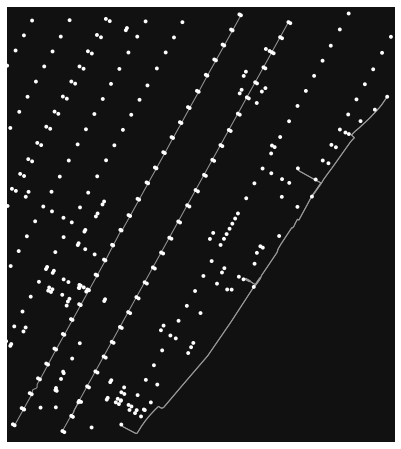

In [15]:
fig, ax = ox.plot_graph(G_bike)

In [16]:
import numpy as np
import pandas as pd
# np.unique(edges.loc[:, "highway"].values)
pd.Series(edges.loc[:, "highway"].values)

0            trunk
1         tertiary
2            trunk
3      residential
4          primary
          ...     
722        service
723    residential
724        service
725        service
726        service
Length: 727, dtype: object

In [17]:
def get_bikepaths(_x):
    return "cycleway" in _x

cycleways = edges.loc[:, "highway"].apply(get_bikepaths)

In [18]:
cycleways = edges[cycleways]

In [19]:
G_bike = ox.graph_from_gdfs(nodes, bikepaths_only)

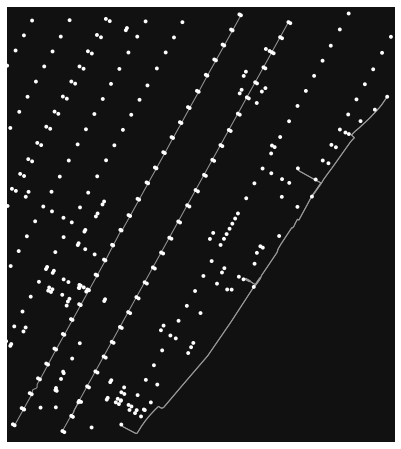

In [20]:
fig, ax = ox.plot_graph(G_bike)

In [21]:
def get_lists(_x):
    return type(_x)==list

duals = edges[edges.loc[:, "highway"].apply(get_lists)]

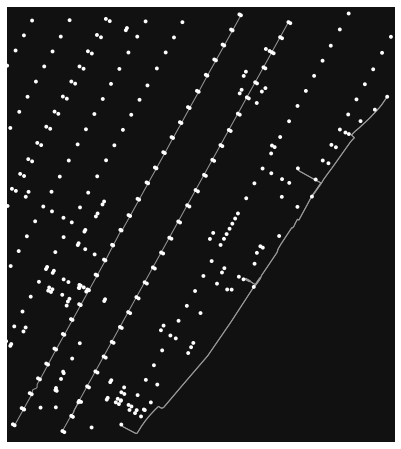

In [22]:
G_duals = ox.graph_from_gdfs(nodes, bikepaths_only)
fig, ax = ox.plot_graph(G_duals)

In [23]:
G = ox.graph_from_address("420 East 73rd Street, New York, New York 10021", network_type="bike")
    
non_cycleways = [
    (u, v, k) for u, v, k, d in G.edges(keys=True, data=True)
    if not ('cycleway' in d or d['highway']=='cycleway')
]

G.remove_edges_from(non_cycleways)
cycleways = ox.utils_graph.remove_isolated_nodes(G)

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


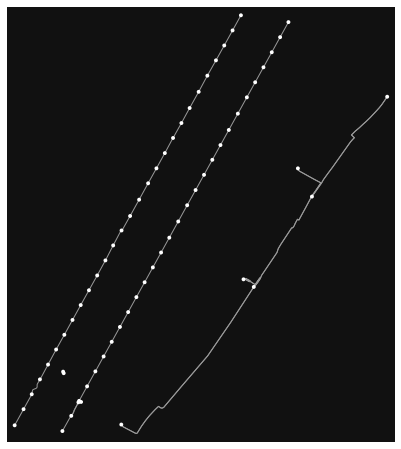

In [24]:
fig, ax = ox.plot_graph(cycleways)

## Get node-associated edges

In [25]:
G = ox.graph_from_address("420 East 73rd Street, New York, New York 10021", network_type="bike")

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [26]:
G

In [27]:
G.nodes

NodeView((42423747, 42423752, 42424089, 42424137, 42424672, 42427965, 42427968, 42427970, 42427972, 42427975, 42427979, 42427985, 42427991, 42427996, 42428003, 42428005, 42428007, 42428010, 42428012, 42428013, 42428014, 42428015, 42428016, 42428020, 42428022, 42428024, 42428027, 42428029, 42428032, 42428034, 42428037, 42428039, 42429348, 42429685, 42429688, 42429690, 42429693, 42429694, 42429980, 42429981, 42429986, 42430050, 42430052, 42430056, 42430060, 42430063, 42430068, 42430075, 42430959, 42431654, 42431656, 42431659, 42431661, 42431677, 42431678, 42431680, 42431681, 42431684, 42432861, 42435516, 42435518, 42435522, 42436477, 42436481, 42436484, 42436486, 42436489, 42436492, 42436519, 42436527, 42436531, 42436911, 42436913, 42436914, 42436917, 42436919, 42436921, 42436922, 42437428, 42437433, 42437436, 42437445, 42437451, 42438490, 42438498, 42438503, 42438506, 42438509, 42438513, 42438791, 42438795, 42438798, 42438800, 42438802, 42438805, 42439403, 42439406, 42439409, 42439416, 

In [28]:
G.edges

OutMultiEdgeView([(42423747, 42423752, 0), (42423752, 6263094853, 0), (42423752, 6744466013, 0), (42424089, 7064022539, 0), (42424089, 42442961, 0), (42424137, 42427970, 0), (42424672, 42427965, 0), (42424672, 3785575834, 0), (42424672, 2348688861, 0), (42427965, 42424672, 0), (42427965, 5119773922, 0), (42427965, 8586594919, 0), (42427968, 8586594919, 0), (42427968, 42427970, 0), (42427968, 42451332, 0), (42427970, 42429986, 0), (42427970, 42451332, 0), (42427970, 42427968, 0), (42427970, 42427972, 0), (42427972, 42427975, 0), (42427972, 42427970, 0), (42427975, 42427972, 0), (42427975, 42427979, 0), (42427975, 4999169398, 0), (42427979, 42427975, 0), (42427979, 42427985, 0), (42427979, 9030177779, 0), (42427979, 4999169398, 0), (42427985, 42437451, 0), (42427985, 42427979, 0), (42427985, 42427991, 0), (42427991, 1733612459, 0), (42427991, 42427985, 0), (42427991, 42427996, 0), (42427996, 42455695, 0), (42427996, 42427991, 0), (42427996, 42428003, 0), (42428003, 6695964688, 0), (42428

In [29]:
route

[42439567,
 42430075,
 6263083538,
 6176390171,
 42430068,
 42430063,
 42430060,
 42439559,
 42438798,
 42436484,
 42436481,
 596776057]

In [30]:
ox.stats.streets_per_node(G)

{42423747: 1,
 42423752: 4,
 42424089: 4,
 42424137: 1,
 42424672: 5,
 42427965: 4,
 42427968: 4,
 42427970: 5,
 42427972: 3,
 42427975: 4,
 42427979: 4,
 42427985: 3,
 42427991: 4,
 42427996: 3,
 42428003: 4,
 42428005: 4,
 42428007: 4,
 42428010: 4,
 42428012: 4,
 42428013: 4,
 42428014: 4,
 42428015: 4,
 42428016: 4,
 42428020: 4,
 42428022: 4,
 42428024: 4,
 42428027: 4,
 42428029: 4,
 42428032: 4,
 42428034: 4,
 42428037: 4,
 42428039: 4,
 42429348: 3,
 42429685: 4,
 42429688: 4,
 42429690: 4,
 42429693: 4,
 42429694: 4,
 42429980: 4,
 42429981: 4,
 42429986: 4,
 42430050: 3,
 42430052: 4,
 42430056: 4,
 42430060: 4,
 42430063: 4,
 42430068: 4,
 42430075: 4,
 42430959: 3,
 42431654: 4,
 42431656: 4,
 42431659: 4,
 42431661: 4,
 42431677: 4,
 42431678: 4,
 42431680: 4,
 42431681: 4,
 42431684: 4,
 42432861: 4,
 42435516: 4,
 42435518: 4,
 42435522: 4,
 42436477: 4,
 42436481: 4,
 42436484: 4,
 42436486: 4,
 42436489: 4,
 42436492: 4,
 42436519: 4,
 42436527: 4,
 42436531: 4,
 42436

In [31]:
ox.utils_graph.count_streets_per_node(G, nodes=[42439567])

{42439567: 4}

In [32]:
out_edges = list(G.out_edges(route[0]))

In [33]:
in_edges = list(G.in_edges(route[0]))

In [34]:
all_edges = out_edges + in_edges

In [35]:
all_edges

[(42439567, 42428012),
 (42439567, 42430075),
 (42438805, 42439567),
 (6263083513, 42439567)]

In [36]:
G.get_edge_data(in_edges[0][0], in_edges[0][1])

{0: {'osmid': [421853954, 421853949],
  'oneway': True,
  'lanes': '5',
  'name': '1st Avenue',
  'highway': 'primary',
  'maxspeed': '25 mph',
  'length': 81.28,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fd0794bc8e0>}}

# Get graph of specific bounds

In [52]:
places = [
    "East Village, Manhattan, New York, New York, USA",
    "Greenwich Village, Manhattan, New York, New York, USA",
    "West Village, Manhattan, New York, New York, USA",
    "Union Square, Manhattan, New York, New York, USA",
]

In [53]:
G = ox.graph.graph_from_place(places, network_type="bike")

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


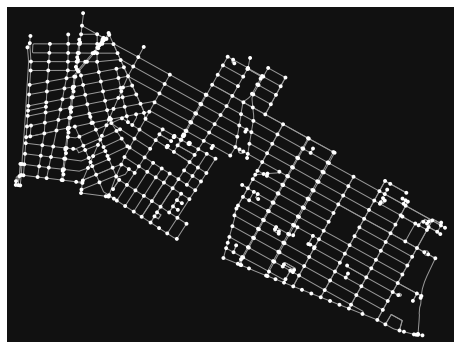

In [54]:
fig, ax = ox.plot_graph(G)

In [2]:
corners = [
    (40.75739, -74.00591), # West 34th
    (40.7432, -73.97139), # East 34th
    (40.73549, -73.97182), # About East 23rd
    (40.7283, -73.9706), # About East 16th
    (40.7092, -73.976), # Navy Yard-ish
    (40.7047, -73.9987), # Brooklyn Bridge-ish
    (40.696, -74.0174), # The Battery
    (40.7272, -74.0249), # Holland Tunnel
    (40.75739, -74.00591), # West 34th
]

corners_new = [(i[1], i[0]) for i in corners]

from shapely.geometry import Polygon

boundaries = Polygon(corners_new)

boundaries

G = ox.graph.graph_from_polygon(boundaries, network_type="bike")

/usr/local/Caskroom/miniconda/base/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/Caskroom/miniconda/base/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/Caskroom/miniconda/base/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


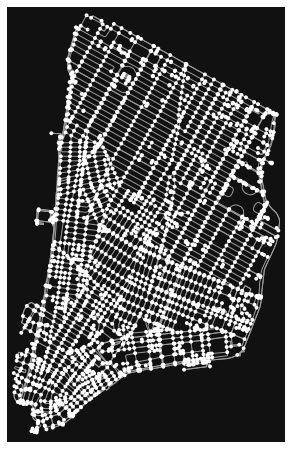

In [3]:
fig, ax = ox.plot_graph(G)

In [4]:
ox.io.save_graphml(G, filepath='../../data/mnh_below_34th.graphml')